In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine = load_wine()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

Create a DataFrame for easier manipulation and inspection

In [33]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
shape = wine_df.shape
print(shape)
labels = wine.target # the labels of the wines

(178, 13)


Analyze Data

In [37]:
print(f"Number of samples: {len(wine_df)}")
print(f"Number of features: {shape[1]}\n")
summary_stats = wine_df.describe()
min_max = summary_stats.loc[['min', 'max']] # get min and max for each feature
# range of each feature
print("Features' range:")
for feature in wine_df.columns:
    print(f'{feature}: {min_max.loc["min", feature]} - {min_max.loc["max", feature]}')

print("\nFeatures' STD:")
print(wine_df.std())
print("\nFeatures' Variance:")
print(wine_df.var())
# print(wine_df.corr())

Number of samples: 178
Number of features: 13

Features' range:
alcohol: 11.03 - 14.83
malic_acid: 0.74 - 5.8
ash: 1.36 - 3.23
alcalinity_of_ash: 10.6 - 30.0
magnesium: 70.0 - 162.0
total_phenols: 0.98 - 3.88
flavanoids: 0.34 - 5.08
nonflavanoid_phenols: 0.13 - 0.66
proanthocyanins: 0.41 - 3.58
color_intensity: 1.28 - 13.0
hue: 0.48 - 1.71
od280/od315_of_diluted_wines: 1.27 - 4.0
proline: 278.0 - 1680.0

Features' STD:
alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64

Fe

Check accuracy for different test size ratio 

In [82]:
def train_and_predict(df, labels):
    ratios = np.arange(0.1, 1, 0.1) # different ratios
    result = []
    for ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=ratio)
        lr = LogisticRegression(max_iter=10000) # we chose number of iteration to reach converge
        lr.fit(X_train, y_train) # train the model
    
        predicted = lr.predict(X_test) # predict the labels
    
        score = accuracy_score(y_test, predicted) 
        result.append(score)
    
    plt.plot(ratios, result)
    plt.xlabel('Test Ratio')
    plt.ylabel('Accuracy')
    plt.title('Results')
    plt.show()

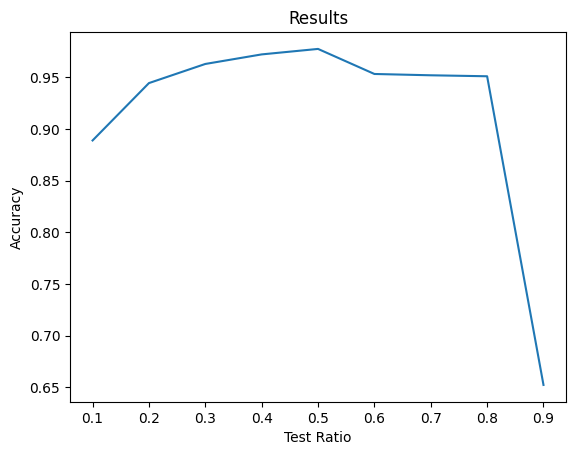

In [83]:
train_and_predict(wine_df, labels)

Create balanced data

In [94]:
labels_df = pd.DataFrame(labels)
label_counts = labels_df.value_counts()
l_min = label_counts.min()
sampled_labels_df = labels_df.groupby(0, group_keys=False).apply(lambda x: x.sample(l_min)) # select l_min number of indexes for each label 

samples_wine_df = wine_df.loc[sampled_labels_df.index] # create the balanced dataframe

C:\Users\rotem\AppData\Local\Temp\ipykernel_24668\908819193.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_labels_df = labels_df.groupby(0, group_keys=False).apply(lambda x: x.sample(l_min)) # select l_min number of indexes for each label


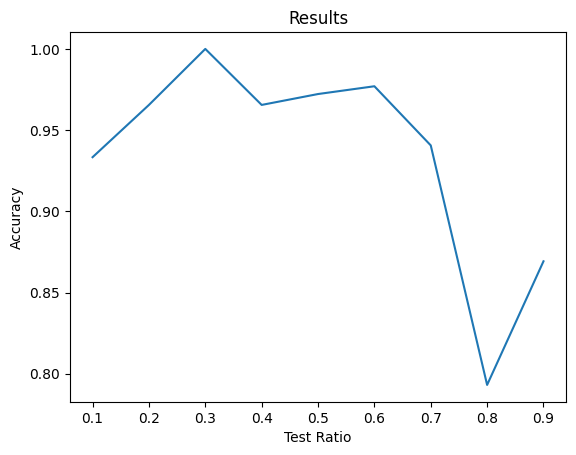

In [104]:
train_and_predict(samples_wine_df, np.ravel(sampled_labels_df.to_numpy()))